In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    
    u = (- strength / (2 * math.pi) * 
         ((X - xd)**2 - (Y - yd)**2) / 
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) * 
         2 * (X - xd) * (Y - yd) / 
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_stream_function_potential_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    phi: 2D Numpy array of floats 
        The velocity potential 
    """
    
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    phi = strength / (2 * math.pi) * (X - xd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi, phi

## Setup Doublet Information

In [3]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [4]:
kappa = 1.0
x_doublet, y_doublet = 0.0, 0.0

In [5]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)
psi_doublet, phi_doublet = get_stream_function_potential_doublet(kappa,  x_doublet, y_doublet, X, Y)

## Freestream Setup

In [6]:
u_inf = 1.0

u_freestream = u_inf * numpy.ones((N,N), dtype=float)
v_freestream = numpy.zeros((N,N), dtype=float)

psi_freestream = u_inf * Y
phi_freestream = u_inf * X

## Superposition of Doublet and Freestream

In [7]:
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet
phi = phi_freestream + phi_doublet

## Plot Streamlines and Velocity Potential

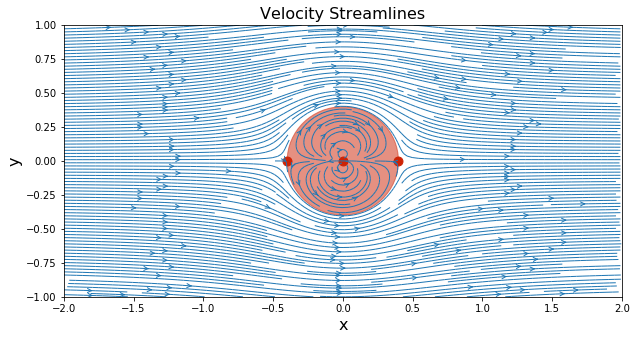

In [8]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Velocity Streamlines', fontsize = 16)
pyplot.streamplot(X, Y, u, v,
                  density=3, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

#plot circle
R = math.sqrt(kappa / (2*math.pi * u_inf))
circle = pyplot.Circle((x_doublet, y_doublet), R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

#plot stagnation point
x_stagn1, y_stagn1 = R, 0.0
x_stagn2, y_stagn2 = -R, 0.0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='#CD2305', s=80, marker='o');


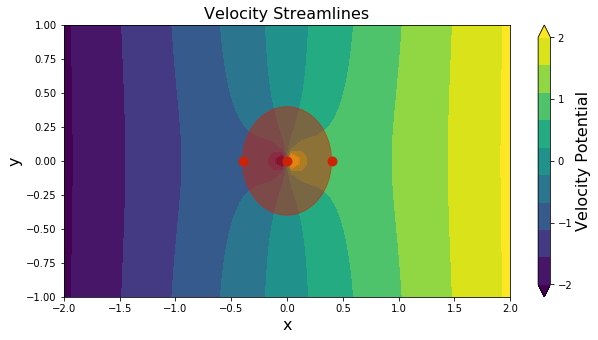

In [9]:
# plot the velocity potential
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Velocity Streamlines', fontsize = 16)
phicontf = pyplot.contourf(X, Y, phi, levels=numpy.linspace(-2, 2, 10), extend='both')
cbar = pyplot.colorbar(phicontf)
cbar.set_label('Velocity Potential', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0, 2.0])
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

#plot circle
R = math.sqrt(kappa / (2*math.pi * u_inf))
circle = pyplot.Circle((x_doublet, y_doublet), R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

#plot stagnation point
x_stagn1, y_stagn1 = R, 0.0
x_stagn2, y_stagn2 = -R, 0.0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='#CD2305', s=80, marker='o');


## Adding a Vortex

In [10]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    phi: 2D Numpy array of floats
        The velocity potential 
    """
    psi = strength / (4 * math.pi) * numpy.log((X - xv)**2 + (Y - yv)**2)
    phi = strength / (2 * math.pi) * numpy.arctan2(X, Y)
    
    return psi, phi

In [11]:
gamma = 4.0
x_vortex, y_vortex = 0.0, 0.0

In [12]:
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

psi_vortex, phi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

## Superposition including Vortex

In [13]:
u_tot = u + u_vortex
v_tot = v + v_vortex
psi_tot = psi_freestream + psi_doublet + psi_vortex
phi_tot = phi_freestream + phi_doublet + phi_vortex

## Plotting Streamlines and Velocity Potential

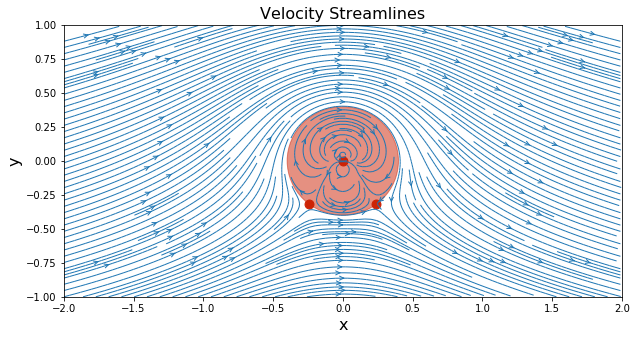

In [14]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Velocity Streamlines', fontsize = 16)
pyplot.streamplot(X, Y, u_tot, v_tot,
                  density=3, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

#plot circle
R = math.sqrt(kappa / (2*math.pi * u_inf))
circle = pyplot.Circle((x_doublet, y_doublet), R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

#plot stagnation point
x_stagn1, y_stagn1 = math.sqrt(R**2 - (gamma**2 / (16 * math.pi**2 * u_inf**2))), -gamma / (4 * math.pi * u_inf)
x_stagn2, y_stagn2 = -math.sqrt(R**2 - (gamma**2 / (16 * math.pi**2 * u_inf**2))), -gamma / (4 * math.pi * u_inf)
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='#CD2305', s=80, marker='o');


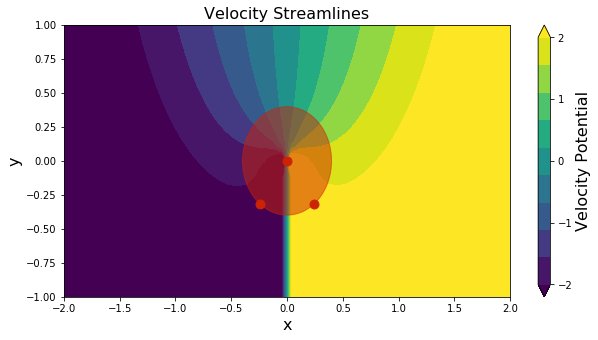

In [15]:
# plot the velocity potential
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Velocity Streamlines', fontsize = 16)
phicontf = pyplot.contourf(X, Y, phi_tot, levels=numpy.linspace(-2, 2, 10), extend='both')
cbar = pyplot.colorbar(phicontf)
cbar.set_label('Velocity Potential', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0, 2.0])
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

#plot circle
R = math.sqrt(kappa / (2*math.pi * u_inf))
circle = pyplot.Circle((x_doublet, y_doublet), R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

#plot stagnation point
x_stagn1, y_stagn1 = math.sqrt(R**2 - (gamma**2 / (16 * math.pi**2 * u_inf**2))), -gamma / (4 * math.pi * u_inf)
x_stagn2, y_stagn2 = -math.sqrt(R**2 - (gamma**2 / (16 * math.pi**2 * u_inf**2))), -gamma / (4 * math.pi * u_inf)
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='#CD2305', s=80, marker='o');


## Pressure Contour

## Pressure Coefficient

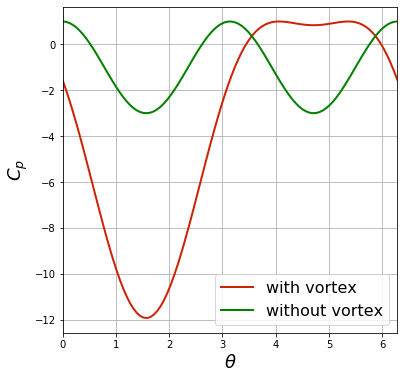

In [25]:
theta = numpy.linspace(0, 2 * math.pi, 100)
u_r = 0
u_theta = -2 * u_inf * numpy.sin(theta) - gamma / (2 * numpy.pi * R)
u_theta_noVortex = -2 * u_inf * numpy.sin(theta)

Cp_vortex = 1 - (u_theta**2 / u_inf**2)
Cp_noVortex = 1 - (u_theta_noVortex**2 / u_inf**2)

size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel(r'$\theta$', fontsize=18)
pyplot.ylabel('$C_p$', fontsize=18)
pyplot.xlim(theta.min(), theta.max())
pyplot.plot(theta, Cp_vortex,
            label='with vortex', color='#CD2305', linewidth=2, linestyle='-')
pyplot.plot(theta, Cp_noVortex,
            label='without vortex', color='g', linewidth=2, linestyle='-')
pyplot.legend(loc='best', prop={'size':16});
